In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_validate ,cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [24]:
# Load CSV file into a DataFrame
train_path = "../data/train_normalize.csv"
train_df = pd.read_csv(train_path)

# Ensure all columns are displayed
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Display first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,60,65.0,8450,1,0,100,100,100,60,100,6,60,60,100,90,7,5,2003,2003,80,60,70,70,85,196.0,80,65,100,80,65,20,100,706,10,0,150,856,100,100,1,100,856,854,0,1710,1,0,2,1,3,1,80,8,100,0,0,80,2003.0,66,2,548,65,65,100,0,61,0,0,0,0,0,0,0,0,2,2008,80,100,208500
1,2,20,60,80.0,9600,1,0,100,100,100,40,100,25,50,60,100,70,6,8,1976,1976,80,60,40,40,0,0.0,65,65,70,80,65,100,80,978,10,0,284,1262,100,100,1,100,1262,0,0,1262,0,1,2,0,3,1,50,6,100,1,65,80,1976.0,66,2,460,65,65,100,298,0,0,0,0,0,0,0,0,0,5,2007,80,100,181500
2,3,60,60,68.0,11250,1,0,75,100,100,60,100,6,60,60,100,90,7,5,2001,2002,80,60,70,70,85,162.0,80,65,100,80,65,40,100,486,10,0,434,920,100,100,1,100,920,866,0,1786,1,0,2,1,3,1,80,6,100,1,65,80,2001.0,66,2,608,65,65,100,0,42,0,0,0,0,0,0,0,0,9,2008,80,100,223500
3,4,70,60,60.0,9550,1,0,75,100,100,80,100,7,60,60,100,90,7,5,1915,1970,80,60,60,65,0,0.0,65,65,80,65,80,20,80,216,10,0,540,756,100,80,1,100,961,756,0,1717,1,0,1,0,3,1,80,7,100,1,80,60,1998.0,33,3,642,65,65,100,0,35,272,0,0,0,0,0,0,0,2,2006,80,20,140000
4,5,60,60,84.0,14260,1,0,75,100,100,40,100,16,60,60,100,90,8,5,2000,2000,80,60,70,70,85,350.0,80,65,100,80,65,70,100,655,10,0,490,1145,100,100,1,100,1145,1053,0,2198,1,0,2,1,4,1,80,9,100,1,65,80,2000.0,66,3,836,65,65,100,192,84,0,0,0,0,0,0,0,0,12,2008,80,100,250000


In [25]:
# Define X (features) and y (target)
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

# Combine all drop keys into a single list
drop_keys = [
    "Heating", "HeatingQC", "BsmtHalfBath", "BsmtFinType2", "GarageCond", "ExterCond", 
    "MasVnrType", "Exterior2nd", "EnclosedPorch", "3SsnPorch", "LowQualFinSF", "PoolArea", 
    "PoolQC", "Fence", "HouseStyle", "RoofStyle", "Condition2", "MSSubClass", "MiscVal", 
    "BldgType", "Street", "Alley", "LotShape", "Electrical", "Utilities", "MiscFeature", 
    "LandSlope", "FullBath", "BsmtFinSF2", "HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", 
    "Foundation", "Functional", "MasVnrArea", "2ndFlrSF", "Fireplaces", "Exterior1st", 
    "PavedDrive", "ScreenPorch", "Neighborhood", "LotConfig", "LandContour", 
    "MoSold", "LotFrontage", "YrSold", "GarageArea"
]

# Drop the columns with 0 feature impotents 
X = X.drop(columns=drop_keys)


# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# from hyperopt import fmin, tpe, hp, Trials
# from sklearn.impute import SimpleImputer

# # Define objective function for hyperparameter tuning
# def objective_xgb(params):
#     xgb_model = XGBRegressor(
#         n_estimators=int(params['n_estimators']),
#         max_depth=int(params['max_depth']),
#         learning_rate=params['learning_rate'],
#         subsample=params['subsample'],
#         random_state=42,
#         objective="reg:squarederror"
#     )

#     # Handle missing values
#     imputer = SimpleImputer(strategy='mean')
#     X_train_imputed = imputer.fit_transform(X_train)  # Ensure missing values are handled

#     # Use cross-validation to evaluate the model
#     score = cross_val_score(xgb_model, X_train_imputed, y_train, cv=3, scoring='neg_mean_squared_error').mean()
#     return -score  # Hyperopt minimizes, so return negative MSE

# # Define the hyperparameter search space
# space_xgb = {
#     'n_estimators': hp.randint('n_estimators', 100, 501),  # Number of trees (100-500)
#     'max_depth': hp.randint('max_depth', 1, 21),  # Tree depth (1-20)
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),  # Learning rate (0.01-0.3)
#     'subsample': hp.uniform('subsample', 0.5, 1.0)  # Row sampling fraction (50%-100%)
# }

# # Set up trials for tracking
# trials_xgb = Trials()

# # Run Hyperopt optimization
# best_xgb = fmin(
#     fn=objective_xgb,  # Corrected function name
#     space=space_xgb,
#     algo=tpe.suggest,
#     max_evals=100,  # Number of evaluations
#     trials=trials_xgb
# )

# print("\nBest Parameters for XGBoost:", best_xgb)

# # Convert best params to correct types
# best_n_estimators = int(best_xgb['n_estimators'])
# best_max_depth = int(best_xgb['max_depth'])
# best_learning_rate = best_xgb['learning_rate']
# best_subsample = best_xgb['subsample']

### XGBoost Hyperparameter Tuning Summary

#### **Hyperopt Optimization Results**
- **Total Evaluations:** 100  
- **Best Found Loss (MSE):** **631,023,888.12**  
- **Optimization Time:** **4 minutes 44 seconds**  
- **Average Time per Trial:** **2.85 seconds**  

#### **Best Hyperparameters Found:**
| Hyperparameter    | Best Value |
|------------------|------------|
| **Learning Rate** | 0.0687 |
| **Max Depth**     | 2 |
| **Number of Estimators** | 465 |
| **Subsample Fraction**  | 0.966 |

#### **Observations:**
- The optimal **learning rate (0.0687)**  is moderately low, balancing learning speed and generalization.
- **Max depth of 3** indicates that shallow trees prevent overfitting while still capturing key patterns.
- The best **number of estimators (465)** suggests that more boosting rounds help improve model performance.
- **Subsampling (0.97) **introduces randomness, increasing robustness and reducing variance.

The model will now be trained using these optimized hyperparameters for final evaluation. 🚀

In [27]:
# Initialize the XGBoost model with specific hyperparameters
model = XGBRegressor(
    n_estimators=120,   # Number of trees (boosting rounds)
    max_depth=1,        # Maximum depth of each tree (controls complexity)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    subsample=0.9,      # Fraction of samples used per tree (prevents overfitting)
    random_state=42,    # Seed for reproducibility
    reg_alpha=0.1,      # L1 regularization (sparsity)
    reg_lambda=1.0,     # L2 regularization (weight shrinkage)
    objective="reg:squarederror"
)


# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Predict on training data
y_train_pred = model.predict(X_train)

# Compute RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Display evaluation results including both train and test RMSE
evaluation_results = pd.DataFrame({
    "Metric": ["Train RMSE", "Test RMSE", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [train_rmse, test_rmse, mae, r2]
})

print(evaluation_results)

                      Metric         Value
0                 Train RMSE  24428.218152
1                  Test RMSE  26124.845581
2  Mean Absolute Error (MAE)  18060.845119
3                   R² Score      0.859427


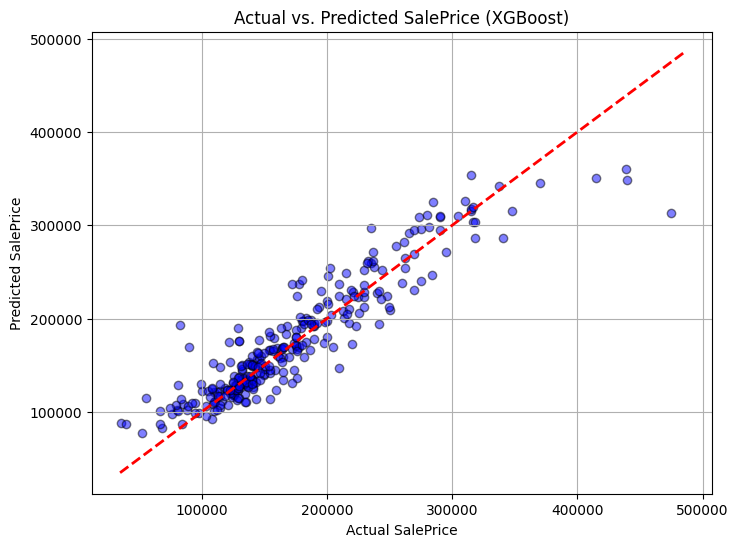

In [29]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red", linewidth=2)  # Ideal fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (XGBoost)")
plt.grid(True)
plt.show()

In [30]:
# Baseline model: Predicting the mean of the training target for all test samples
baseline_pred = [np.mean(y_train)] * len(y_test) 

# Compute the MAE of the baseline model
baseline_mae = mean_absolute_error(y_test, baseline_pred)

# Print baseline performance
print("Baseline MAE:", baseline_mae)

# Calculate model improvement over baseline
improvement = (baseline_mae - mae) / baseline_mae * 100
print("Model Improvement over Baseline:", improvement, "%")

# Print the mean of the target variable (SalePrice)
print("Mean of target variable:", np.mean(train_df['SalePrice']))


Baseline MAE: 54811.0969398033
Model Improvement over Baseline: 67.04892598840615 %
Mean of target variable: 178272.87250172294


In [31]:
# Cross-Validation
scoring = {
    'RMSE': 'neg_root_mean_squared_error', 
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# Perform cross-validation
cv_results = cross_validate(
    model, 
    X_train, 
    y_train, 
    cv=5,  # Number of folds (e.g., 5-fold cross-validation)
    scoring=scoring,
    return_train_score=True
)

# Display the cross-validation results
print("\nCross-Validation Results:")
print(f"Train RMSE: {-np.mean(cv_results['train_RMSE']):.2f} ± {np.std(cv_results['train_RMSE']):.2f}")
print(f"Test RMSE: {-np.mean(cv_results['test_RMSE']):.2f} ± {np.std(cv_results['test_RMSE']):.2f}")
print(f"Mean Absolute Error (MAE): {np.mean(cv_results['test_MAE']):.2f} ± {np.std(cv_results['test_MAE']):.2f}")
print(f"R² Score: {np.mean(cv_results['test_R2']):.4f} ± {np.std(cv_results['test_R2']):.4f}")



Cross-Validation Results:
Train RMSE: 23720.18 ± 345.02
Test RMSE: 27160.74 ± 1453.16
Mean Absolute Error (MAE): 18717.39 ± 1145.92
R² Score: 0.8581 ± 0.0139


In [32]:
# Get feature importance from the trained model
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=True)

feature_importance.head(81)

,Feature,Importance
0,Id,0.000000
3,Condition1,0.002831
21,KitchenAbvGr,0.002929
12,BsmtExposure,0.003448
20,BsmtFullBath,0.003458
8,RoofMatl,0.003672
31,SaleType,0.003699
32,SaleCondition,0.003811
15,BsmtUnfSF,0.003892
30,OpenPorchSF,0.004387


# 📊 XGBoost Model Performance Analysis

## 💡 Model Insights:
- The model **significantly outperforms** the baseline, reducing the error by **67.05%**.
- The **Mean Absolute Error (MAE)** is **10.14%** of the **mean sale price** (**$178,272.87**), indicating a **reasonable prediction accuracy**.
- The **R² score** of **0.8594** shows that the model explains **~86% of the variance** in sale prices.
- **Cross-validation** confirms the model's **consistency**, as the validation metrics align closely with test results.

---

## 📈 **Key Takeaways:**
- ✅ **Good Model Performance:** The model generalizes well to **unseen data**.
- ✅ **Consistent Results:** The similarity between **test** and **cross-validation** metrics suggests a **stable model**.
- ✅ **Significant Improvement Over Baseline:** The model is **67% more accurate** than a simple mean predictor, confirming it **effectively captures patterns** in the data.

---

## 🔧 **Possible Next Steps:**
- **Try Other Models:** Compare against **RandomForestRegressor** or **LightGBM** for possible improvements.
- **Residual Analysis:** Visualize prediction errors to detect potential biases.

In [33]:
# Load the test dataset into a DataFrame
test_path = "../data/test_normalize.csv"
test_df = pd.read_csv(test_path)

# Drop features with low level of important  
test_df = test_df.drop(columns=drop_keys)

# Predict SalePrice using the trained model
predict = model.predict(test_df)

# Create a DataFrame to store results with Id and Predicted SalePrice
results_df = test_df[["Id"]].copy()
results_df["PredictedPrice"] = predict  

# Save the results to DataFrame as a CSV file
results_df.to_csv("../results/xgboost.csv", index=False)

print("CSV file saved successfully at: ../results/xgboost.csv")

CSV file saved successfully at: ../results/xgboost.csv
